## About Dataset
Description: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering/data
The attributes are:
<ul>
    <li>Alcohol</li>
    <li>Malic acid</li>
    <li>Ash</li>
    <li>Alcalinity of ash</li>
    <li>Magnesium</li>
    <li>Total phenols</li>
    <li>Flavanoids</li>
    <li>Nonflavanoid phenols</li>
    <li>Proanthocyanins</li>
    <li>Color intensity</li>
    <li>Hue</li>
    <li>OD280/OD315 of diluted wines</li>
    <li>Proline</li>
</ul>

We'll follow these steps:
<ul>
    <li>Normalize the data for better clustering performance.</li>
    <li>Use the Elbow method to determine the optimal number of clusters.</li>
    <li>Apply K-means clustering.</li>
    <li>Visualize the clusters.</li>
</ul>

In [1]:
# import EDA tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# load dataset
df = pd.read_csv('../../dataset/wine-clustering.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


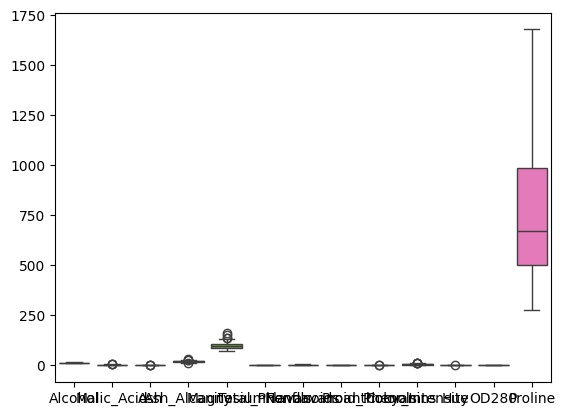

In [3]:
# plot out initial data condition
sns.boxplot(data=df);

In [4]:
# lets apply StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

In [5]:
normalized_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

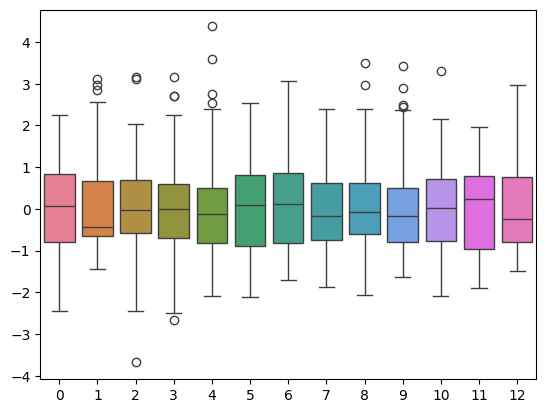

In [6]:
sns.boxplot(data=normalized_data);

In [7]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
cluster_range= range(1, 11)

for i in cluster_range:
    kmean = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmean.fit(normalized_data)
    wcss.append(kmean.inertia_)

In [8]:
wcss

[2314.0000000000005,
 1661.6761165626506,
 1277.928488844642,
 1211.7531134671583,
 1123.156547079696,
 1079.538509158826,
 1014.4309086924652,
 982.6549762937698,
 927.956076072621,
 879.4257007542494]

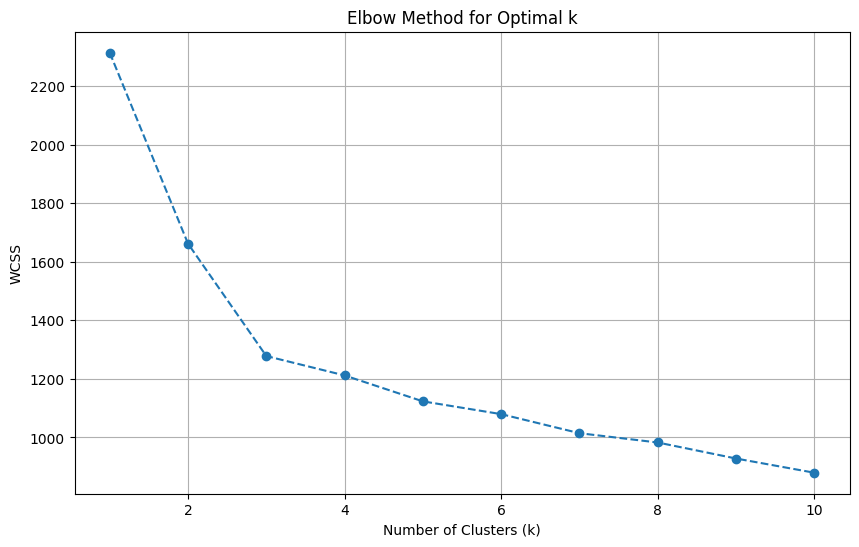

In [9]:
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker="o", linestyle="--")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

### Knee locator

In [10]:
!pip install kneed

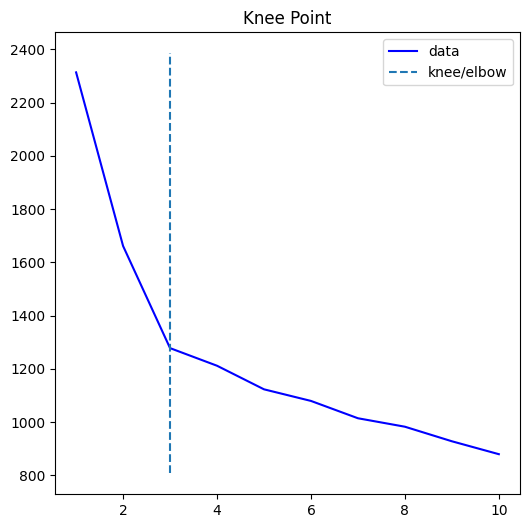

In [11]:
from kneed import KneeLocator
kl = KneeLocator(cluster_range, wcss, curve="convex", direction="decreasing")
kl.plot_knee()

In [12]:
kl.elbow

3

In [13]:
# Apply K-means clustering with k=3 (based on Elbow method)
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
cluster = kmeans.fit_predict(normalized_data)

In [14]:
kmeans.cluster_centers_

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

In [15]:
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

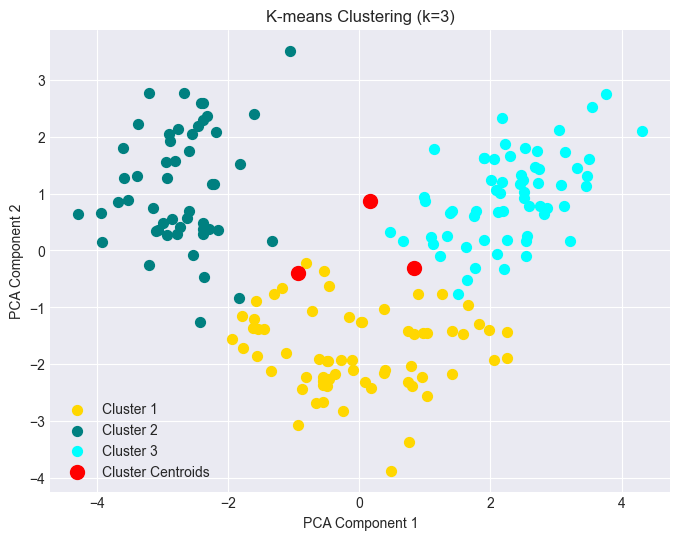

In [16]:
plt.style.use('seaborn-v0_8-dark')
# Visualizing all clusters and their centroids
plt.subplots(figsize=(8, 6))

colors = ['gold', 'teal', 'cyan']

for i in range(0, 3):
    cluster_count = i + 1
    plt.scatter(pca_data[cluster==i, 0], pca_data[cluster==i, 1], s=50, c=colors[i], label=f"Cluster {cluster_count}")

# plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="red", label="Cluster Centroids")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (k=3)')
plt.grid(True)
plt.legend()
plt.show();